<a href="https://colab.research.google.com/github/GhanshyamRegar/-Tumor_Detection-project/blob/main/%20Tumor_Detection-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#  Load Dataset
df = pd.read_csv("Tumor_Detection.csv")



In [3]:
# Data cleaning
df = df.drop(columns=['id'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  

# categorical values assignment
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) 



Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


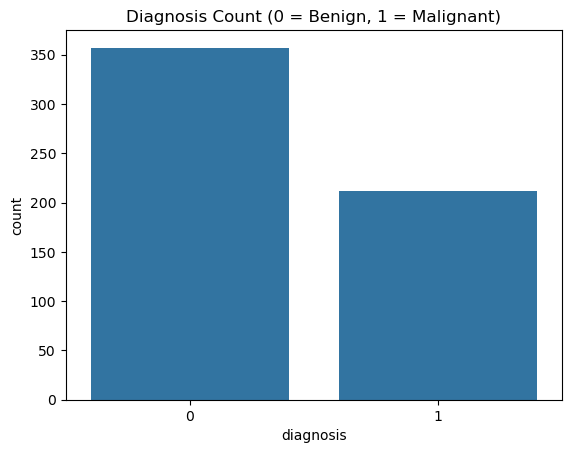

In [4]:
#  Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

#  Visualization of Class 
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Count (0 = Benign, 1 = Malignant)')
plt.show()

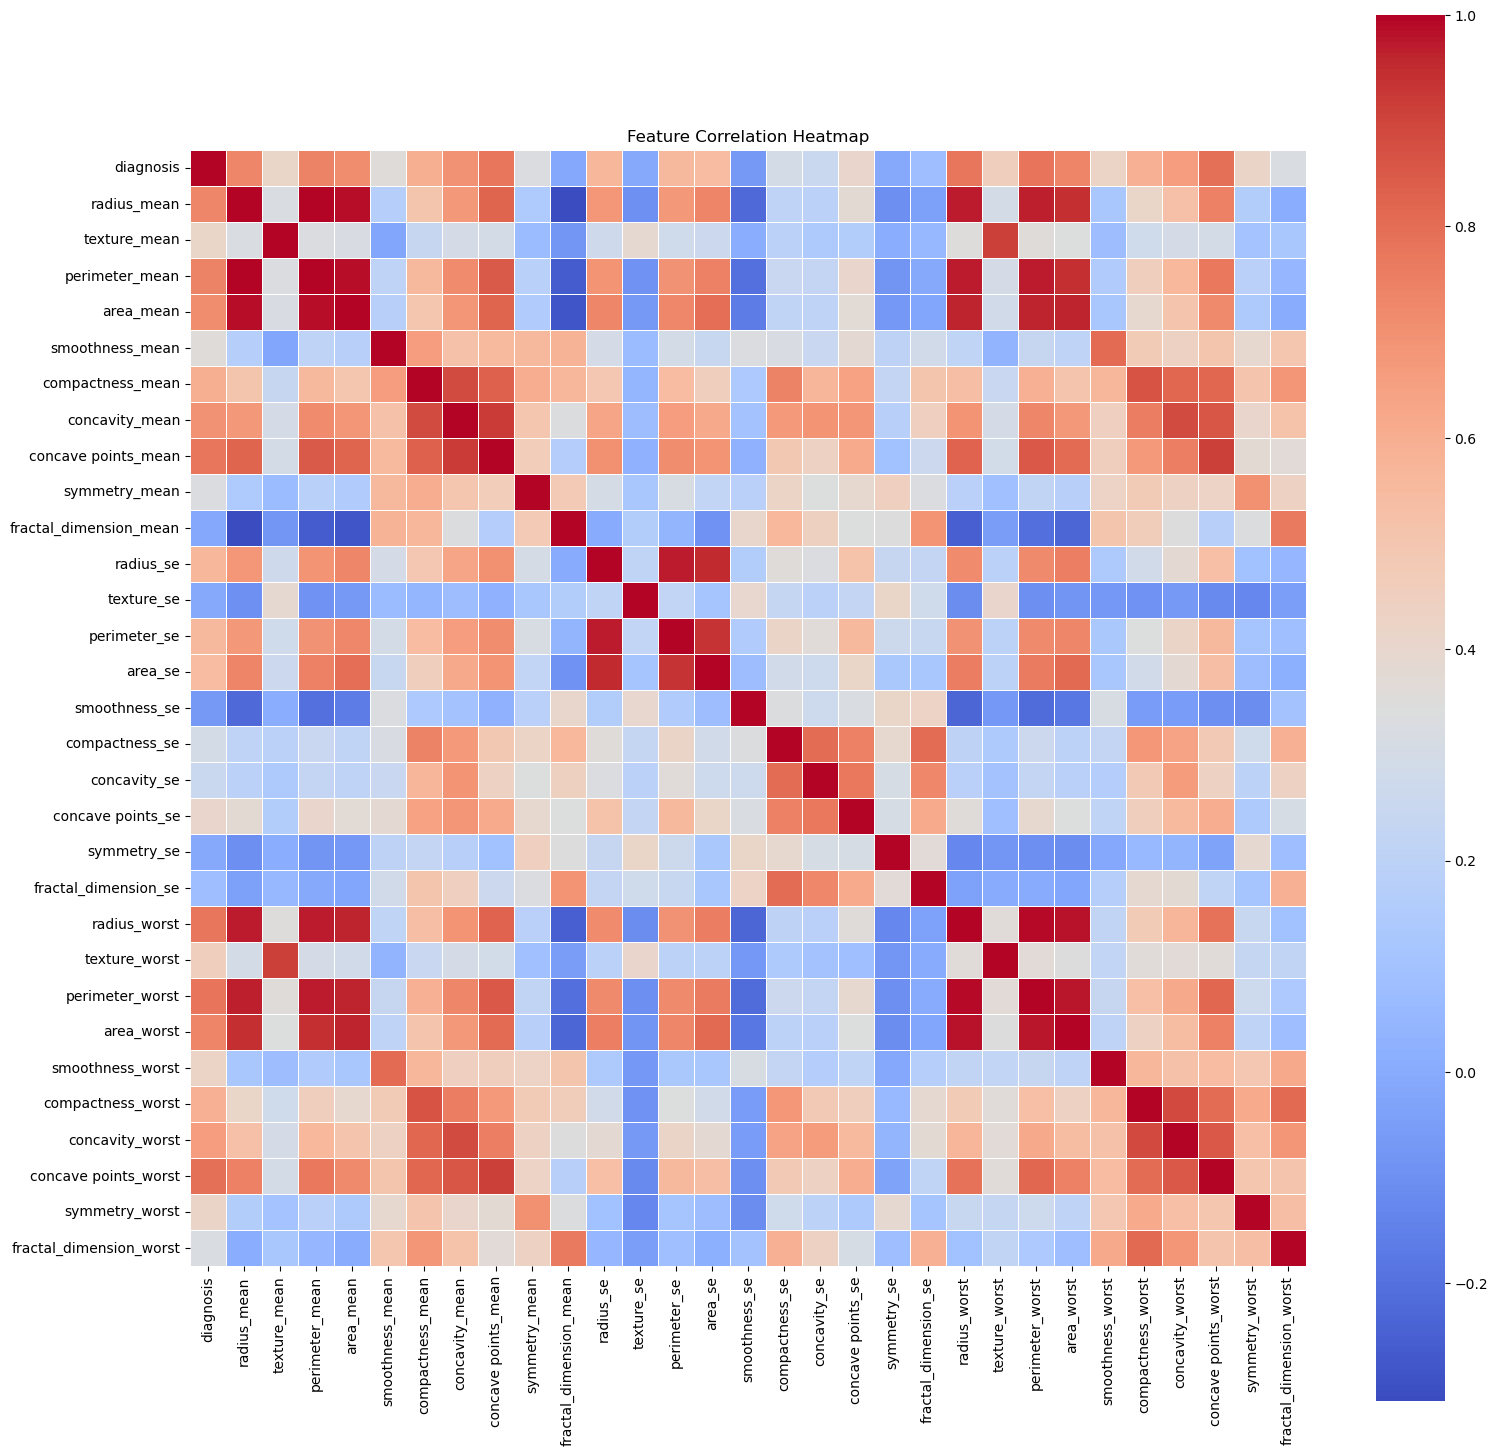

In [5]:
#  Correlation Heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [6]:
#  Split Features, Labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#  Training and Testind data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Random Forest 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Evaluating model
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9649122807017544

📊 Confusion Matrix:
 [[70  1]
 [ 3 40]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

